In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cd 'Group Project'

[Errno 2] No such file or directory: 'Group Project'
/Users/andrewrafaeljames/Documents/Statistical Models for Data Science/Group Project


### Load Data

In [5]:
weather = pd.read_csv('weather_classification_data.csv')

In [8]:
weather

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Check Null Values

In [12]:
weather.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### Check Descriptive Stats

In [15]:
weather.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [198]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [201]:
weather['Cloud Cover'].dtypes

dtype('O')

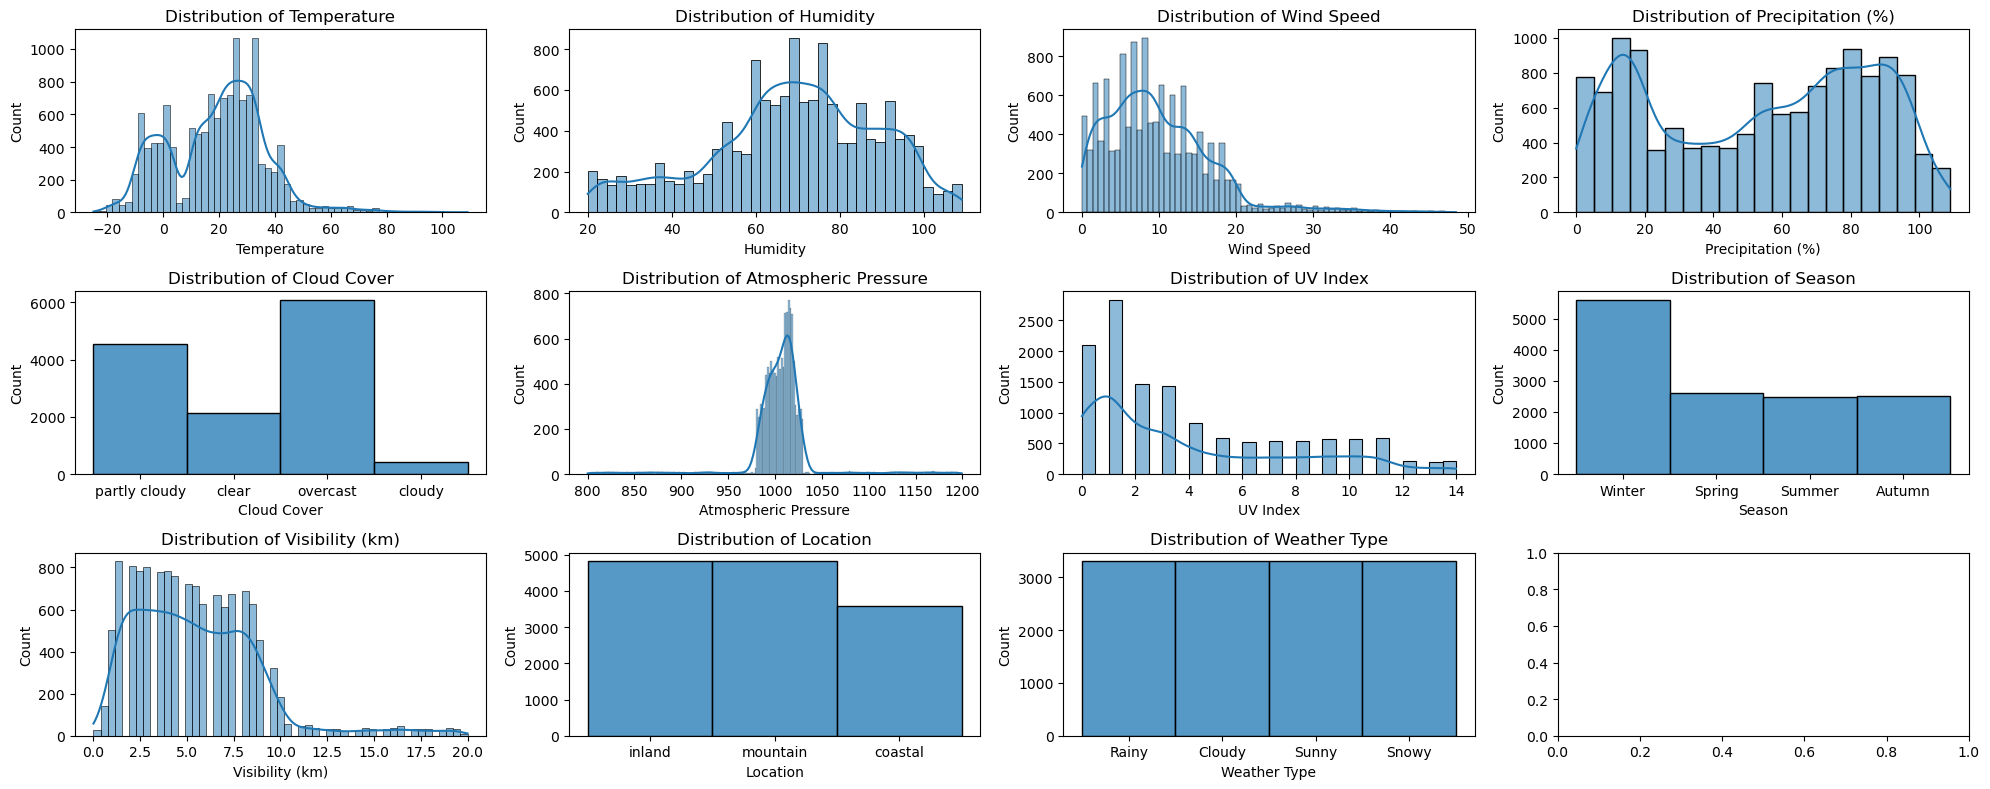

In [203]:
fig, ax = plt.subplots(3, 4, figsize=(20, 8))
ax = ax.flatten()

for idx, col in enumerate(weather.columns):
    if weather[col].dtypes == 'O':
        sns.histplot(data = weather, x = col, kde = False, ax = ax[idx])
        ax[idx].set_title(f'Distribution of {col}')
    else:
        sns.histplot(data = weather, x = col, kde = True, ax = ax[idx])
        ax[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Check Proportion of Observation by Weather Type

In [205]:
weather_type = weather.groupby('Weather Type').agg({"Temperature":"count"}).reset_index().rename(columns={'Temperature':'total_obs'})
weather_type['prop_obs'] = weather_type['total_obs']/ weather_type['total_obs'].sum()
weather_type

,Weather Type,total_obs,prop_obs
0,Cloudy,3300,0.25
1,Rainy,3300,0.25
2,Snowy,3300,0.25
3,Sunny,3300,0.25


### Check Whether Cloud Cover Can Infer Weather Type

In [209]:
weather_cloud = weather.groupby(['Cloud Cover','Weather Type']).agg({'Temperature':'count'}).reset_index().rename(columns={'Temperature':'num_obs'})
weather_cloud

,Cloud Cover,Weather Type,num_obs
0,clear,Sunny,2139
1,cloudy,Cloudy,92
2,cloudy,Rainy,105
3,cloudy,Snowy,107
4,cloudy,Sunny,107
5,overcast,Cloudy,1305
6,overcast,Rainy,2193
7,overcast,Snowy,2489
8,overcast,Sunny,103
9,partly cloudy,Cloudy,1903


Text(0.5, 1.0, 'Number of Observations by Cloud Cover Categories and Weather Types')

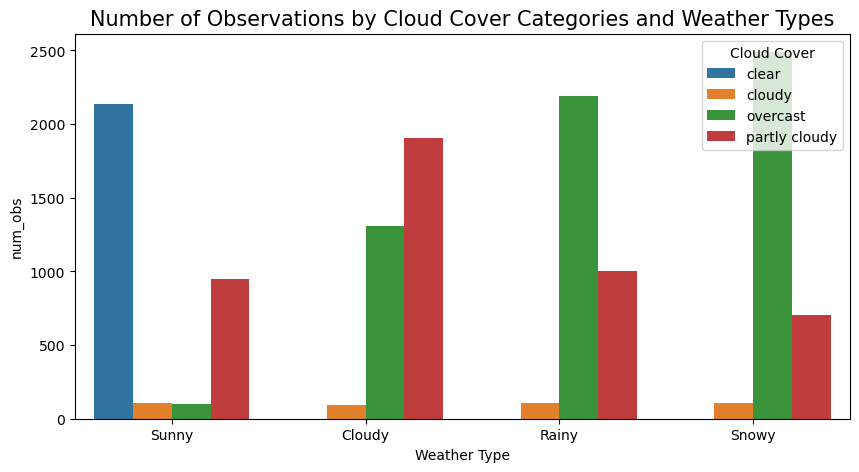

In [213]:
plt.figure(figsize = (10, 5))
sns.barplot(data = weather_cloud, x = 'Weather Type', y = 'num_obs', hue = 'Cloud Cover')
plt.title('Number of Observations by Cloud Cover Categories and Weather Types', fontsize = 15)
# plt.legend(location= 'upper right')

### Check Whether Season Can Infer Weather Type

In [215]:
weather.groupby(['Season','Weather Type']).agg({'Temperature':'count'}).reset_index()

,Season,Weather Type,Temperature
0,Autumn,Cloudy,806
1,Autumn,Rainy,796
2,Autumn,Snowy,69
3,Autumn,Sunny,829
4,Spring,Cloudy,850
5,Spring,Rainy,831
6,Spring,Snowy,80
7,Spring,Sunny,837
8,Summer,Cloudy,766
9,Summer,Rainy,820


### Check Proportion of Weather Type Observations by Different Features

/var/folders/l9/dnzr221j0297_44d01ngx_1m0000gn/T/ipykernel_2078/890873250.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_temp['overall_obs_'+column] = weather_temp.groupby(column+'_binned')['total_obs_'+column].transform('sum')
/var/folders/l9/dnzr221j0297_44d01ngx_1m0000gn/T/ipykernel_2078/890873250.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_temp['overall_obs_'+column] = weather_temp.groupby(column+'_binned')['total_obs_'+column].transform('sum')
/var/folders/l9/dnzr221j0297_44d01ngx_1m0000gn/T/ipykernel_2078/890873250.py:30: FutureWarning: The default of observed=False is dep

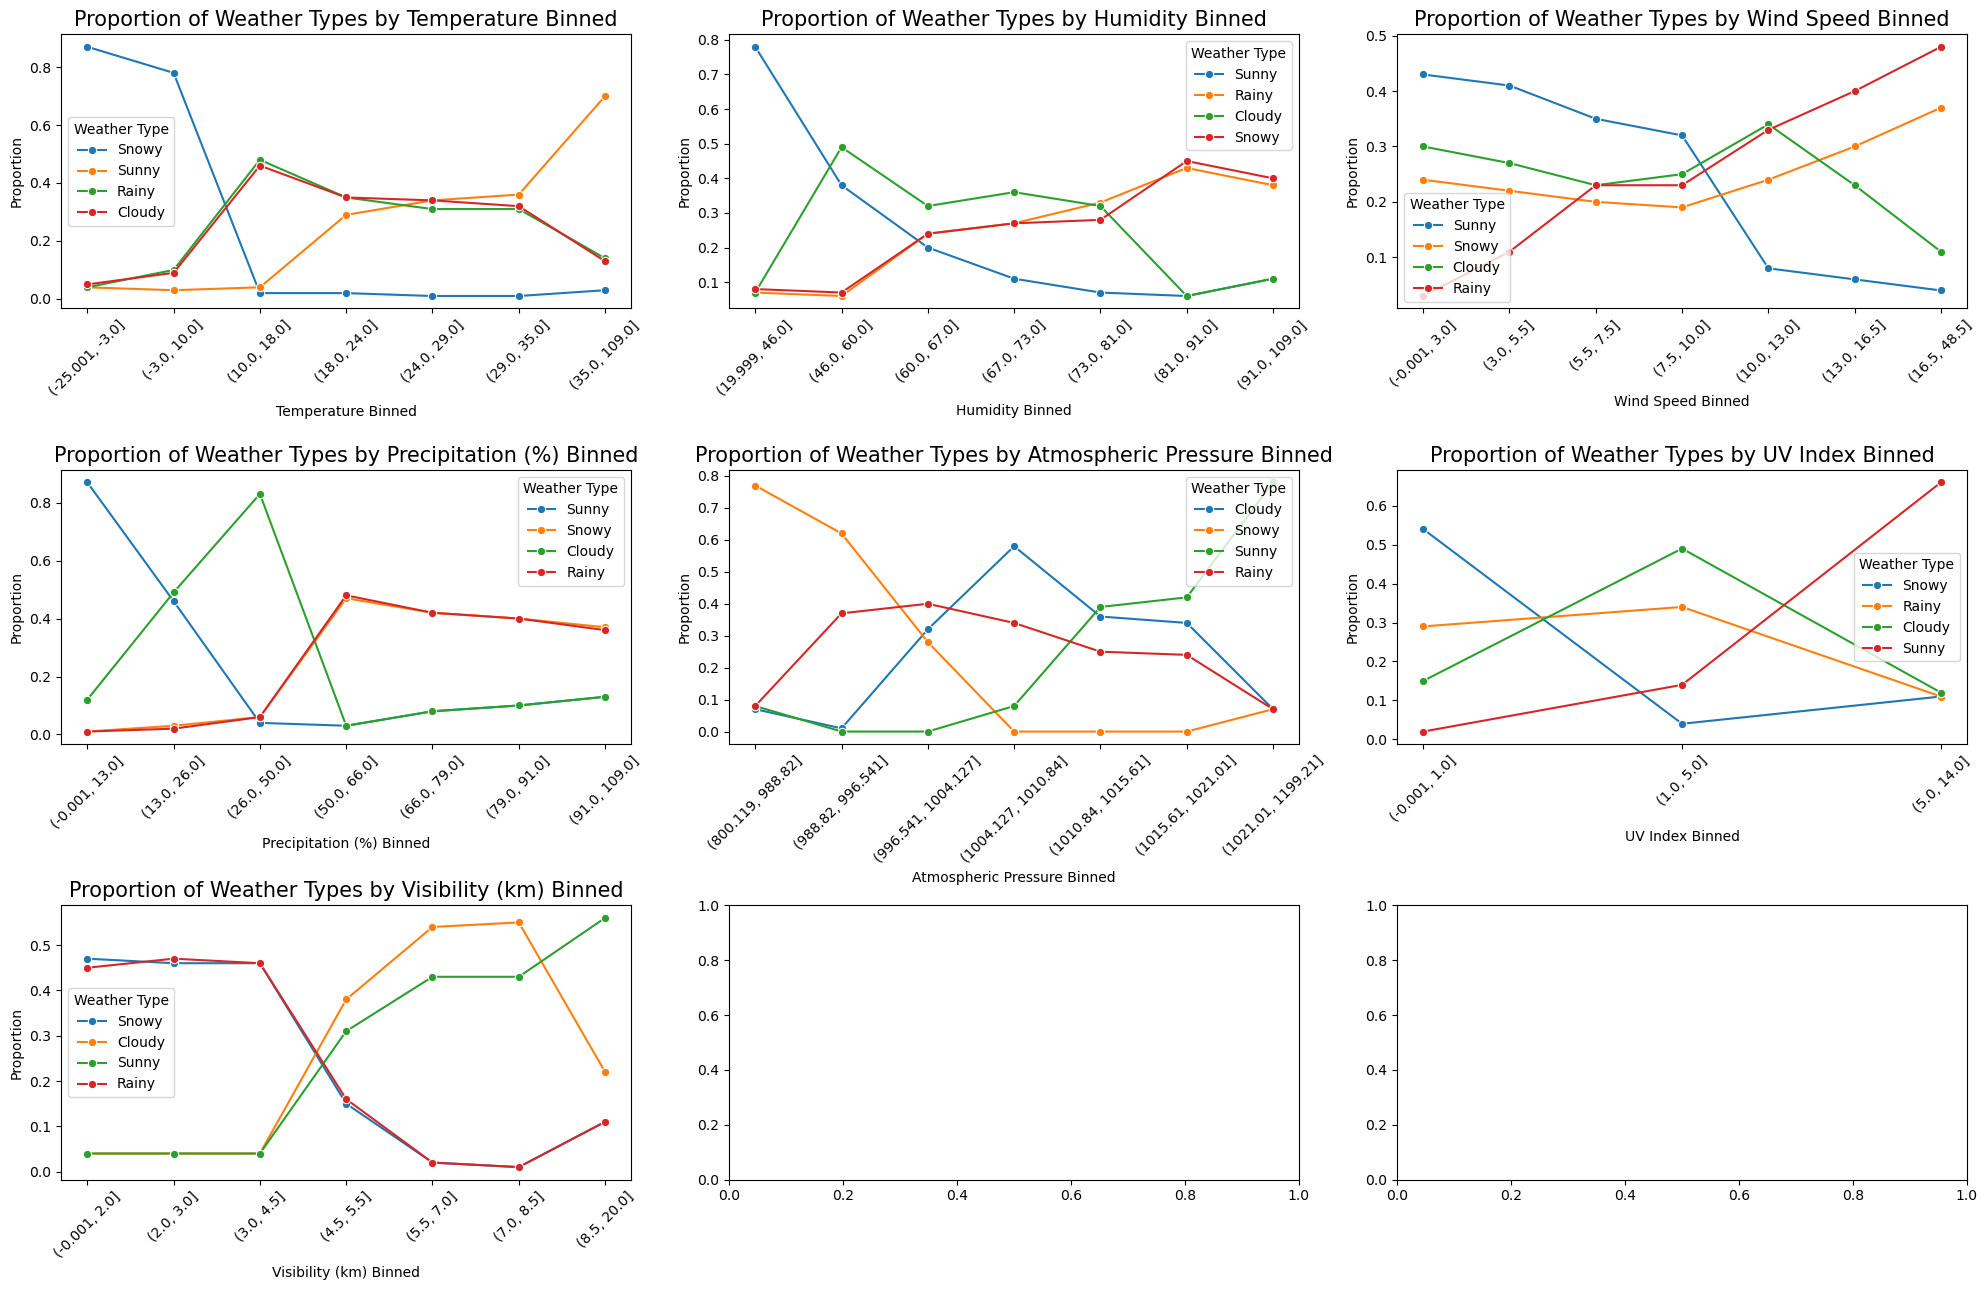

In [430]:
columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index',
       'Visibility (km)']
fig, axes = plt.subplots(3, 3, figsize=(20, 13))  # 3 rows, 3 columns
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, column in enumerate(columns):
    if column == 'UV Index':
        weather[column+'_binned'] = pd.qcut(weather[column], q = 3)
        weather[column+'_binned'].unique().sort_values()
        weather_temp = weather[[column+'_binned','Weather Type']].value_counts().reset_index().rename(columns={'count':'total_obs_'+column})
        weather_temp['overall_obs_'+column] = weather_temp.groupby(column+'_binned')['total_obs_'+column].transform('sum')
        weather_temp['prop_'+column] =  round(weather_temp['total_obs_'+column] / weather_temp['overall_obs_'+column], 2)
        weather_temp = weather_temp.sort_values(column+'_binned')
        weather_temp = weather_temp.reset_index(drop=True)
        weather_temp[column+'_binned'] = weather_temp[column+'_binned'].astype(str)
            
        sns.lineplot(data=weather_temp, x=column + '_binned', y='prop_' + column, hue='Weather Type', marker='o', ax=axes[idx])
        
        # Adjust labels and title for each subplot
        axes[idx].set_title(f'Proportion of Weather Types by {column} Binned', fontsize = 15)
        axes[idx].set_xlabel(f'{column} Binned')
        axes[idx].set_ylabel('Proportion')
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

    else:
        weather[column+'_binned'] = pd.qcut(weather[column], q = 7)
        weather[column+'_binned'].unique().sort_values()
        weather_temp = weather[[column+'_binned','Weather Type']].value_counts().reset_index().rename(columns={'count':'total_obs_'+column})
        weather_temp['overall_obs_'+column] = weather_temp.groupby(column+'_binned')['total_obs_'+column].transform('sum')
        weather_temp['prop_'+column] =  round(weather_temp['total_obs_'+column] / weather_temp['overall_obs_'+column], 2)
        weather_temp = weather_temp.sort_values(column+'_binned')
        weather_temp = weather_temp.reset_index(drop=True)
        weather_temp[column+'_binned'] = weather_temp[column+'_binned'].astype(str)
            
        sns.lineplot(data=weather_temp, x=column + '_binned', y='prop_' + column, hue='Weather Type', marker='o', ax=axes[idx])
        
        # Adjust labels and title for each subplot
        axes[idx].set_title(f'Proportion of Weather Types by {column} Binned', fontsize = 15)
        axes[idx].set_xlabel(f'{column} Binned')
        axes[idx].set_ylabel('Proportion')
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()

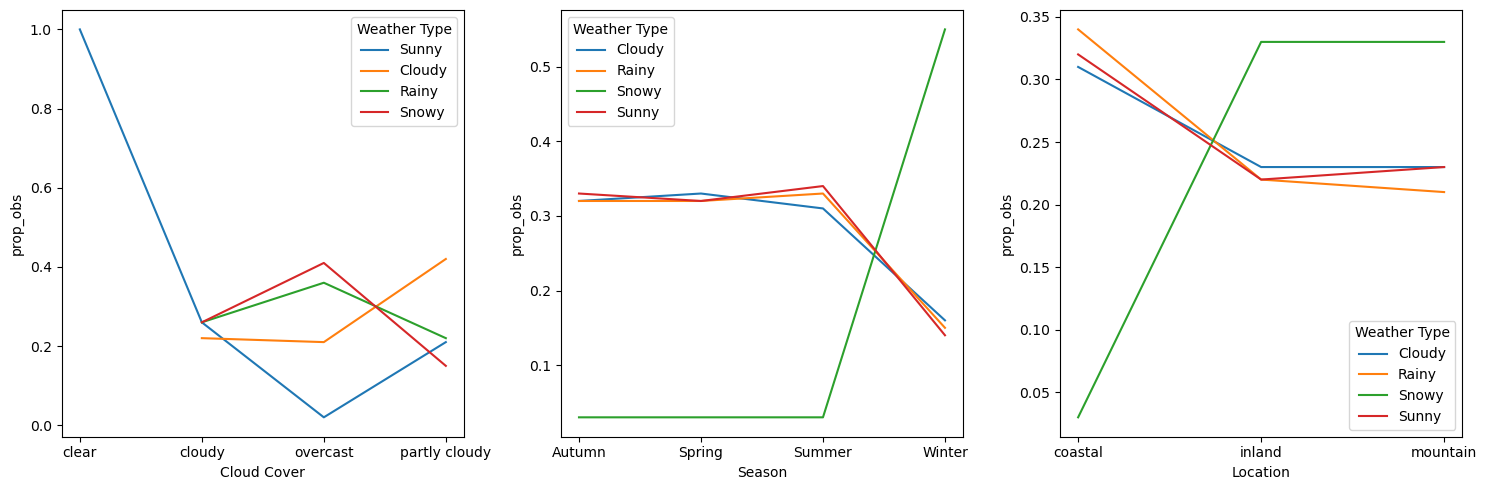

In [220]:
columns = ['Cloud Cover', 'Season', 'Location']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(columns):
    weather_df = weather.groupby([col, 'Weather Type']).agg({'Temperature':'count'}).reset_index().rename(columns={'Temperature':'num_obs'})
    weather_df['overall_obs'] = weather_df.groupby(col)['num_obs'].transform('sum')
    weather_df['prop_obs'] = round(weather_df['num_obs'] / weather_df['overall_obs'], 2)

    sns.lineplot(data=weather_df, x=col, y ='prop_obs', hue = 'Weather Type', ax=ax[idx])

plt.tight_layout()
plt.show()


In [222]:
weather_df

,Location,Weather Type,num_obs,overall_obs,prop_obs
0,coastal,Cloudy,1106,3571,0.31
1,coastal,Rainy,1216,3571,0.34
2,coastal,Snowy,120,3571,0.03
3,coastal,Sunny,1129,3571,0.32
4,inland,Cloudy,1107,4816,0.23
5,inland,Rainy,1069,4816,0.22
6,inland,Snowy,1575,4816,0.33
7,inland,Sunny,1065,4816,0.22
8,mountain,Cloudy,1087,4813,0.23
9,mountain,Rainy,1015,4813,0.21


In [224]:
weather.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Temperature_binned',
       'Humidity_binned', 'Wind Speed_binned', 'Precipitation (%)_binned',
       'Atmospheric Pressure_binned', 'Visibility (km)_binned'],
      dtype='object')

In [375]:
df = weather.drop(columns=['Cloud Cover'])
df = df.drop(columns=[col for col in df.columns if 'binned' in col])
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,990.67,1,Winter,2.5,mountain,Rainy


In [377]:
# IQR-based outlier removal for numeric columns
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['number'])  # Only numeric columns
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    filtered_df = df[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]
    return filtered_df

df = remove_outliers_iqr(df)

print(df.columns)

df.shape

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)',
       'Location', 'Weather Type'],
      dtype='object')


(11689, 10)

### Transform Categorical Variables into Dummies

In [379]:
df = pd.get_dummies(data = df, columns=['Location', 'Season'], drop_first = True)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [383]:
df = df.reset_index(drop = True)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Location_inland,Location_mountain,Season_Spring,Season_Summer,Season_Winter
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,1,0,0,0,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,1,0,1,0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,0,1,1,0,0
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,0,0,1,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11684,29.0,62,13.0,17.0,1002.81,2,5.0,Cloudy,0,0,1,0,0
11685,10.0,74,14.5,71.0,1003.15,1,1.0,Rainy,0,1,0,1,0
11686,30.0,77,5.5,28.0,1012.69,3,9.0,Cloudy,0,0,0,0,0
11687,3.0,76,10.0,94.0,984.27,0,2.0,Snowy,1,0,0,0,1


In [385]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('%', 'percent')

df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent',
       'Atmospheric_Pressure', 'UV_Index', 'Visibility_km', 'Weather_Type',
       'Location_inland', 'Location_mountain', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

### Feature Engineering (Standardization)

In [388]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

column_to_scale = ['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent',
       'Atmospheric_Pressure', 'UV_Index', 'Visibility_km']
df_scaled = scaler.fit_transform(df[column_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns= ['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent',
       'Atmospheric_Pressure', 'UV_Index', 'Visibility_km'])
df_scaled = df_scaled.join(df[['Location_inland', 'Location_mountain', 'Season_Spring',
       'Season_Summer', 'Season_Winter','Weather_Type']])
df_scaled

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km,Location_inland,Location_mountain,Season_Spring,Season_Summer,Season_Winter,Weather_Type
0,-0.319956,0.180018,0.050410,0.935683,0.352182,-0.448083,-0.616594,1,0,0,0,1,Rainy
1,1.250401,1.364687,-0.127689,0.592525,0.399333,0.940475,1.878101,1,0,1,0,0,Cloudy
2,0.685072,-0.283548,-0.394836,-1.123266,0.962832,0.385052,0.151005,0,1,1,0,0,Sunny
3,1.187586,0.695092,-1.374378,0.935683,1.544883,0.940475,-1.576092,0,0,1,0,0,Sunny
4,0.496630,0.231525,1.386148,0.436544,-1.205363,-0.725794,-1.000393,0,1,0,0,1,Rainy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11684,0.622258,-0.386563,0.673754,-1.092070,-0.266971,-0.448083,-0.040895,0,0,1,0,0,Cloudy
11685,-0.571213,0.231525,0.940902,0.592525,-0.240690,-0.725794,-1.576092,0,1,0,1,0,Rainy
11686,0.685072,0.386047,-0.661984,-0.748912,0.496728,-0.170371,1.494302,0,0,0,0,0,Cloudy
11687,-1.010912,0.334540,0.139459,1.310038,-1.700068,-1.003506,-1.192293,1,0,0,0,1,Snowy


### Fit Multinomial Regression

In [432]:
X = df_scaled.iloc[:, :-1]
X = sm.add_constant(X)
y = df_scaled['Weather_Type']

multinomial_model = sm.MNLogit(y, X).fit()
print(multinomial_model.summary())

Optimization terminated successfully.
         Current function value: 0.284055
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:           Weather_Type   No. Observations:                11689
Model:                        MNLogit   Df Residuals:                    11650
Method:                           MLE   Df Model:                           36
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.7951
Time:                        22:21:40   Log-Likelihood:                -3320.3
converged:                       True   LL-Null:                       -16202.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   Weather_Type=Rainy       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8726      0.130     -6.694      0.000      -1.128      -0

In [433]:
#After stepwise selection in R
X = df_scaled[['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent', 'Atmospheric_Pressure', 
               'UV_Index', 'Visibility_km', 'Location_inland', 'Location_mountain', 'Season_Winter']]
X = sm.add_constant(X)
y = df_scaled['Weather_Type']

multinomial_model = sm.MNLogit(y, X).fit()
print(multinomial_model.summary())

Optimization terminated successfully.
         Current function value: 0.284270
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:           Weather_Type   No. Observations:                11689
Model:                        MNLogit   Df Residuals:                    11656
Method:                           MLE   Df Model:                           30
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.7949
Time:                        22:21:40   Log-Likelihood:                -3322.8
converged:                       True   LL-Null:                       -16202.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   Weather_Type=Rainy       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8141      0.102     -8.008      0.000      -1.013      -0

### Save Scaled Dataframe to CSV

In [437]:
df_scaled.to_csv('df_data.csv')

### Run Multinomial Regression in R

In [440]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [442]:
%%R
# install.packages("nnet")
library(nnet)
library(MASS)
df <- read.csv('df_data.csv')

In [444]:
%%R
head(df)

  X Temperature   Humidity  Wind_Speed Precipitation_percent
1 0  -0.3199555  0.1800180  0.05040967             0.9356834
2 1   1.2504006  1.3646873 -0.12768874             0.5925251
3 2   0.6850724 -0.2835483 -0.39483635            -1.1232663
4 3   1.1875864  0.6950916 -1.37437759             0.9356834
5 4   0.4966297  0.2315253  1.38614772             0.4365441
6 5   0.8107009 -0.7471145 -1.01818077            -0.8113043
  Atmospheric_Pressure   UV_Index Visibility_km Location_inland
1            0.3521818 -0.4480828   -0.61659396               1
2            0.3993333  0.9404749    1.87810140               1
3            0.9628323  0.3850518    0.15100461               0
4            1.5448828  0.9404749   -1.57609218               0
5           -1.2053635 -0.7257943   -1.00039325               0
6            0.2911168 -0.4480828   -0.04089503               1
  Location_mountain Season_Spring Season_Summer Season_Winter Weather_Type
1                 0             0             0   

In [446]:
%%R
dim(df)

[1] 11689    14


### Fit the Model

In [449]:
%%R

full_model <- multinom(Weather_Type ~ Temperature + Humidity + Wind_Speed + Precipitation_percent + Atmospheric_Pressure + UV_Index +
                 Visibility_km + Location_inland + Location_mountain + Season_Spring + Season_Summer + Season_Winter, df)
null_model <- multinom(Weather_Type ~ 1, df)

# weights:  56 (39 variable)
initial  value 16204.394787 
iter  10 value 4042.405605
iter  20 value 3739.507542
iter  30 value 3528.880792
iter  40 value 3403.356839
iter  50 value 3322.786712
iter  60 value 3320.323996
iter  60 value 3320.323970
iter  60 value 3320.323970
final  value 3320.323970 
converged
# weights:  8 (3 variable)
initial  value 16204.394787 
final  value 16201.603051 
converged


### Full Model Result

In [452]:
%%R
summary(full_model)

Call:
multinom(formula = Weather_Type ~ Temperature + Humidity + Wind_Speed + 
    Precipitation_percent + Atmospheric_Pressure + UV_Index + 
    Visibility_km + Location_inland + Location_mountain + Season_Spring + 
    Season_Summer + Season_Winter, data = df)

Coefficients:
      (Intercept) Temperature   Humidity Wind_Speed Precipitation_percent
Rainy  -0.8726238  -0.3712808 -0.2002184  0.5733188             1.6610853
Snowy  -8.0873425  -4.4846453 -0.3241185  0.2210565             1.8854701
Sunny  -3.8441010   1.4136993 -0.6977716 -0.3980787            -0.3848046
      Atmospheric_Pressure  UV_Index Visibility_km Location_inland
Rainy            -0.732207 -1.303680     -2.198417     -0.21582956
Snowy            -1.808369 -1.075446     -1.063411      2.22931158
Sunny             2.359553  1.606849      0.124232     -0.06723967
      Location_mountain Season_Spring Season_Summer Season_Winter
Rainy       -0.12340947   -0.01151773    0.19922725   -0.03733556
Snowy        2.40273668   

### Forward Selection Result

In [457]:
%%R
forward_selection_result <- stepAIC(null_model, scope=list(lower=null_model, upper=full_model), direction = 'forward')

Start:  AIC=32409.21
Weather_Type ~ 1

# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 9746.708304
iter  20 value 9656.710062
final  value 9656.655081 
converged
# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 13392.664783
final  value 13392.607312 
converged
# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 14886.820541
final  value 14886.820137 
converged
# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 12080.302114
final  value 12079.662676 
converged
# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 9936.120914
iter  20 value 9918.772691
final  value 9918.762667 
converged
# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 12732.907480
final  value 12732.059911 
converged
# weights:  12 (6 variable)
initial  value 16204.394787 
iter  10 value 11162.722362
iter  20 value 11098.931574
final  value 11098.930933 
converged
# weights:  12 (6 variable)
i

In [458]:
%%R
summary(forward_selection_result)

Call:
multinom(formula = Weather_Type ~ Temperature + Visibility_km + 
    UV_Index + Atmospheric_Pressure + Precipitation_percent + 
    Season_Winter + Wind_Speed + Humidity + Location_mountain + 
    Location_inland, data = df)

Coefficients:
      (Intercept) Temperature Visibility_km  UV_Index Atmospheric_Pressure
Rainy  -0.8140679  -0.3708934    -2.1980627 -1.300658           -0.7296308
Snowy  -7.9635191  -4.4804854    -1.0709740 -1.074240           -1.8076902
Sunny  -3.9254446   1.4162439     0.1224067  1.605671            2.3584301
      Precipitation_percent Season_Winter Wind_Speed   Humidity
Rainy             1.6556300   -0.09639174  0.5710393 -0.1967918
Snowy             1.8833134    3.06346120  0.2180696 -0.3219199
Sunny            -0.3827708   -0.15843349 -0.3968672 -0.6998309
      Location_mountain Location_inland
Rainy       -0.12036898     -0.20807313
Snowy        2.38969398      2.22101058
Sunny       -0.02575795     -0.07152863

Std. Errors:
      (Intercept) Temper

### Backward Selection Result

In [462]:
%%R
backward_selection_result <- stepAIC(full_model, direction = 'backward')

Start:  AIC=6718.65
Weather_Type ~ Temperature + Humidity + Wind_Speed + Precipitation_percent + 
    Atmospheric_Pressure + UV_Index + Visibility_km + Location_inland + 
    Location_mountain + Season_Spring + Season_Summer + Season_Winter

# weights:  52 (36 variable)
initial  value 16204.394787 
iter  10 value 4586.977171
iter  20 value 4441.950638
iter  30 value 4301.068849
iter  40 value 4184.523849
iter  50 value 4120.302156
final  value 4120.290747 
converged
# weights:  52 (36 variable)
initial  value 16204.394787 
iter  10 value 4196.558760
iter  20 value 3833.681789
iter  30 value 3642.628938
iter  40 value 3478.072594
iter  50 value 3371.467842
final  value 3371.344268 
converged
# weights:  52 (36 variable)
initial  value 16204.394787 
iter  10 value 4204.647296
iter  20 value 3815.571867
iter  30 value 3582.718986
iter  40 value 3488.306903
iter  50 value 3405.991770
final  value 3405.792567 
converged
# weights:  52 (36 variable)
initial  value 16204.394787 
iter  10 valu

In [463]:
%%R
summary(backward_selection_result)

Call:
multinom(formula = Weather_Type ~ Temperature + Humidity + Wind_Speed + 
    Precipitation_percent + Atmospheric_Pressure + UV_Index + 
    Visibility_km + Location_inland + Location_mountain + Season_Winter, 
    data = df)

Coefficients:
      (Intercept) Temperature   Humidity Wind_Speed Precipitation_percent
Rainy  -0.8140679  -0.3708934 -0.1967918  0.5710393             1.6556300
Snowy  -7.9635191  -4.4804854 -0.3219199  0.2180696             1.8833134
Sunny  -3.9254446   1.4162439 -0.6998309 -0.3968672            -0.3827708
      Atmospheric_Pressure  UV_Index Visibility_km Location_inland
Rainy           -0.7296308 -1.300658    -2.1980627     -0.20807313
Snowy           -1.8076902 -1.074240    -1.0709740      2.22101058
Sunny            2.3584301  1.605671     0.1224067     -0.07152863
      Location_mountain Season_Winter
Rainy       -0.12036898   -0.09639174
Snowy        2.38969398    3.06346120
Sunny       -0.02575795   -0.15843349

Std. Errors:
      (Intercept) Temper

In [470]:
%%R
xtabs(~ predict(backward_selection_result) + df$Weather_Type)

                                  df$Weather_Type
predict(backward_selection_result) Cloudy Rainy Snowy Sunny
                            Cloudy   2708    82    15   139
                            Rainy     126  2680     7    78
                            Snowy      16    36  2863     9
                            Sunny     144    30    17  2739


In [476]:
%%R
(2708+2680+2863+2739)/nrow(df)

[1] 0.9402002


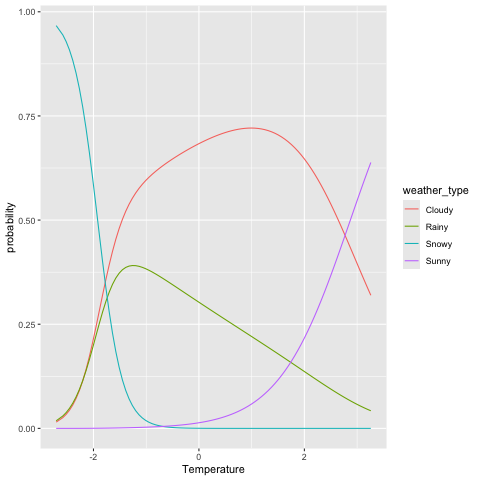

In [518]:
%%R
temp <- unique(df$Temperature)
humidity <- mean(df$Humidity)
wind_speed <- mean(df$Wind_Speed)
precip <- mean(df$Precipitation_percent)
atmos <- mean(df$Atmospheric_Pressure)
uv <- mean(df$UV_Index)
visib <- mean(df$Visibility_km)
# location_inland = 0
# location_mountain = 0
# Season_winter = 0
# table(df$Season_Winter)

new_data <- data.frame(Temperature=temp, Humidity=humidity, Wind_Speed = wind_speed, Precipitation_percent = precip, 
                       Atmospheric_Pressure=atmos, UV_Index=uv, Visibility_km = visib, Location_inland = 0, 
                       Location_mountain=0, Location_mountain = 0, Season_Winter = 0)

prediction <- data.frame(new_data, predict(backward_selection_result, new_data, type='probs'))

library(tidyr)
library(ggplot2)

lpred <- gather(data=prediction, key='weather_type', value='probability', Cloudy, Rainy, Snowy, Sunny)
ggplot(lpred, aes(x=Temperature, y = probability, group=weather_type, color = weather_type))+geom_line()

# predict(backward_selection
# summary(backward_selection_result)
# xtabs(~ predict(backward_selection_result) + df$Weather_Type)

In [494]:
%%R
summary(backward_selection_result)

Call:
multinom(formula = Weather_Type ~ Temperature + Humidity + Wind_Speed + 
    Precipitation_percent + Atmospheric_Pressure + UV_Index + 
    Visibility_km + Location_inland + Location_mountain + Season_Winter, 
    data = df)

Coefficients:
      (Intercept) Temperature   Humidity Wind_Speed Precipitation_percent
Rainy  -0.8140679  -0.3708934 -0.1967918  0.5710393             1.6556300
Snowy  -7.9635191  -4.4804854 -0.3219199  0.2180696             1.8833134
Sunny  -3.9254446   1.4162439 -0.6998309 -0.3968672            -0.3827708
      Atmospheric_Pressure  UV_Index Visibility_km Location_inland
Rainy           -0.7296308 -1.300658    -2.1980627     -0.20807313
Snowy           -1.8076902 -1.074240    -1.0709740      2.22101058
Sunny            2.3584301  1.605671     0.1224067     -0.07152863
      Location_mountain Season_Winter
Rainy       -0.12036898   -0.09639174
Snowy        2.38969398    3.06346120
Sunny       -0.02575795   -0.15843349

Std. Errors:
      (Intercept) Temper

In [322]:
%%R
bs_model = summary(backward_selection_result)

# Extract coefficients
coefficients <- bs_model$coefficients

# Extract standard errors
std_errors <- bs_model$standard.errors

# Calculate z-values
z_values <- coefficients / std_errors

# Calculate p-values
p_values <- 2 * (1 - pnorm(abs(z_values)))

p_values
# Combine results into a table
results <- cbind(coefficients, std_errors, z_values, p_values)
# colnames(results) <- c("Coefficient", "Std. Error", "z-value", "p-value")
print(results)


      (Intercept) Temperature   Humidity Wind_Speed Precipitation_percent
Rainy  -0.1040489  -0.1798176 -0.3393776  0.3796761             1.4715108
Snowy  -4.1303081  -2.4450203 -0.2922955  0.1314594             1.3150406
Sunny  -1.6880200   1.0448831 -0.5535186 -0.5187461            -0.3640612
      Atmospheric_Pressure   UV_Index Visibility_km Location_inland
Rainy           -0.1140135 -0.4510306    -1.0037465     -0.27194792
Snowy           -0.1833364 -0.1955661    -0.4789141      1.22292646
Sunny            0.0747490  1.3223566    -0.1752487      0.01724744
      Location_mountain Season_Winter (Intercept) Temperature   Humidity
Rainy       -0.29347367    -0.3757574  0.06179020  0.04381600 0.04672344
Snowy        1.30127818     2.5076754  0.14722400  0.06622005 0.06301009
Sunny        0.07925909    -0.1522952  0.07822426  0.04641721 0.04462180
      Wind_Speed Precipitation_percent Atmospheric_Pressure   UV_Index
Rainy 0.03957599            0.05033284           0.03441891 0.0432281